In [147]:
import pandas as pd

df = pd.read_csv("Query2_results.csv")
df.head(10)

,airline_code,departure_airport_code,destination_airport_code,departure_date,arrival_date,ticket_price,First_flight,first_flight_code,last_flight_code,selling_airline,departure_time,arrival_time,Detected_Language,Assigned_Country,Assigned_Currency
0,SK,BOS,AMS,"[2024, 10, 7, 18, 5]","[2024, 10, 8, 9, 45]",449,BOS-CPH,SK928,SK2551,Scandinavian Airlines,"""SK""","""2551""",English (United States),Switzerland,CHF
1,B6,BOS,AMS,"[2024, 10, 7, 22, 13]","[2024, 10, 8, 11, 35]",624,BOS-AMS,B631,B631,2024,2024,10,English (United States),Switzerland,CHF
2,DL,BOS,AMS,"[2024, 10, 7, 16, 50]","[2024, 10, 8, 5, 45]",650,BOS-AMS,DL256,VS3914,Delta,2024,10,English (United States),Switzerland,CHF
3,FI,BOS,AMS,"[2024, 10, 7, 20, 50]","[2024, 10, 8, 12, 55]",564,BOS-KEF,FI630,FI500,Icelandair,8,2024,English (United States),Switzerland,CHF
4,TP,BOS,AMS,"[2024, 10, 7, 22, 45]","[2024, 10, 8, 16, 35]",586,BOS-LIS,TP216,TP670,2024,8,2024,English (United States),Switzerland,CHF
5,B6,BOS,AMS,"[2024, 10, 7, 13, 40]","[2024, 10, 8, 9, 20]",628,BOS-JFK,B61517,B62288,JetBlue,7,2024,English (United States),Switzerland,CHF
6,DL,BOS,AMS,"[2024, 10, 7, 18, 55]","[2024, 10, 8, 8]",650,BOS-AMS,NaN,VS3931,Delta,10,8,English (United States),Switzerland,CHF
7,AA,PHL,HAV,"[2024, 7, 10, 8, 20]","[2024, 7, 10, 13, 45]",364,PHL-MIA,AA2534,AA837,American,"""AA""","""837""",English (United States),Switzerland,CHF
8,AA,PHL,HAV,"[2024, 7, 10, 11, 53]","[2024, 7, 10, 17, 30]",364,PHL-MIA,AA438,AA2699,American,"""AA""","""2699""",English (United States),Switzerland,CHF
9,DL,PHL,HAV,"[2024, 7, 10, 15, 40]","[2024, 7, 11, 10, 20]",335,PHL-ATL,DL2279,1787null,Delta,"""1787""",NaN,English (United States),Switzerland,CHF


In [148]:
df.airline_code.value_counts()

airline_code
multi    271
UA        79
AA        66
AC        48
DL        42
BA        30
TK        16
EI        16
LH        16
NH        16
FI        16
WS        16
B6        15
TP        15
IB        14
LX        12
JL        12
AF        12
QR        11
SQ         8
LA         8
EK         8
KE         4
SK         4
BF         4
KL         4
BR         4
UX         3
Name: count, dtype: int64

In [149]:
df.ticket_price.min()

301

In [150]:
df.Assigned_Currency.value_counts()

Assigned_Currency
CHF    197
TRY    187
PLN    186
GBP    182
JOD     18
Name: count, dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   airline_code              770 non-null    object
 1   departure_airport_code    770 non-null    object
 2   destination_airport_code  770 non-null    object
 3   departure_date            770 non-null    object
 4   arrival_date              770 non-null    object
 5   ticket_price              770 non-null    int64 
 6   First_flight              770 non-null    object
 7   first_flight_code         746 non-null    object
 8   last_flight_code          770 non-null    object
 9   selling_airline           770 non-null    object
 10  departure_time            770 non-null    object
 11  arrival_time              747 non-null    object
 12  Detected_Language         770 non-null    object
 13  Assigned_Country          770 non-null    object
 14  Assigned_Currency         

In [152]:
df.columns

Index(['airline_code', 'departure_airport_code', 'destination_airport_code',
       'departure_date', 'arrival_date', 'ticket_price', 'First_flight',
       'first_flight_code', 'last_flight_code', 'selling_airline',
       'departure_time', 'arrival_time', 'Detected_Language',
       'Assigned_Country', 'Assigned_Currency'],
      dtype='object')

In [153]:
# Example conversion rates to USD
# These rates are purely illustrative and may not reflect current rates
conversion_rates = {
    'CHF': 1.134556,  # 1 CHF = 1.134556 USD as of Feb 20, 2024, according to X-Rates
    'TRY': 0.03230,   # 1 TRY = 0.03230 USD as of Feb 21, 2024, according to Wise
    'PLN': 0.250338,  # 1 PLN = 0.250338 USD as of Feb 21, 2024, according to Xe.com
    'GBP': 1.26,      # Example rate, adjust with the actual rate when available
    'JOD': 1.41       # Example rate, adjust with the actual rate when available
}


# Function to convert price to USD
def convert_to_usd(row):
    price = row['ticket_price']
    currency = row['Assigned_Currency']
    conversion_rate = conversion_rates.get(currency, 1.0)  # Default to 1.0 if currency not found
    return price * conversion_rate

# Apply the conversion to each row and create the new column
df['Price_in_USD'] = df.apply(convert_to_usd, axis=1)



In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   airline_code              770 non-null    object 
 1   departure_airport_code    770 non-null    object 
 2   destination_airport_code  770 non-null    object 
 3   departure_date            770 non-null    object 
 4   arrival_date              770 non-null    object 
 5   ticket_price              770 non-null    int64  
 6   First_flight              770 non-null    object 
 7   first_flight_code         746 non-null    object 
 8   last_flight_code          770 non-null    object 
 9   selling_airline           770 non-null    object 
 10  departure_time            770 non-null    object 
 11  arrival_time              747 non-null    object 
 12  Detected_Language         770 non-null    object 
 13  Assigned_Country          770 non-null    object 
 14  Assigned_C

In [155]:
df['Flight_ID'] = df[['airline_code', 'departure_airport_code', 'destination_airport_code','First_flight','last_flight_code','selling_airline','arrival_date','departure_date','departure_time','arrival_time']].astype(str).agg('-'.join, axis=1)

In [156]:
df.Flight_ID.value_counts()

Flight_ID
SK-BOS-AMS-BOS-CPH-SK2551-Scandinavian Airlines-[2024, 10, 8, 9, 45]-[2024, 10, 7, 18, 5]-"SK"-"2551"    4
multi-LAS-HKG-LAS-SFO-BR891-Alaska-[2024, 11, 3, 8]-[2024, 11, 1, 18]-3-2024                             4
multi-SEA-SHJ-SEA-ORD-QR2095-Qatar Airways-[2024, 12, 6, 20]-[2024, 12, 5, 10]-12-6                      4
QR-SEA-DXB-SEA-DOH-QR1014-Qatar Airways-[2024, 12, 6, 20, 55]-[2024, 12, 5, 16, 5]-6-2024                4
multi-LAX-HND-LAX-SEA-UA7929-ANA-[2024, 5, 16, 19]-[2024, 5, 15, 10, 45]-"NH"-"117"                      4
                                                                                                        ..
multi-LAS-HKG-LAS-LAX-PR3914-American-[2024, 11, 3, 17]-[2024, 11, 1, 19, 35]-2024-11                    1
DL-IAD-ATH-IAD-JFK-KL5937-2024-[2024, 11, 13, 11]-[2024, 11, 12, 10, 45]-2024-11                         1
LH-IAD-ATH-IAD-MUC-UA8784-Lufthansa-[2024, 11, 14]-[2024, 11, 12, 22, 20]-11-14                          1
AA-PHL-HAV-PHL-MIA-AA252-Am

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   airline_code              770 non-null    object 
 1   departure_airport_code    770 non-null    object 
 2   destination_airport_code  770 non-null    object 
 3   departure_date            770 non-null    object 
 4   arrival_date              770 non-null    object 
 5   ticket_price              770 non-null    int64  
 6   First_flight              770 non-null    object 
 7   first_flight_code         746 non-null    object 
 8   last_flight_code          770 non-null    object 
 9   selling_airline           770 non-null    object 
 10  departure_time            770 non-null    object 
 11  arrival_time              747 non-null    object 
 12  Detected_Language         770 non-null    object 
 13  Assigned_Country          770 non-null    object 
 14  Assigned_C

In [158]:
grouped = df.groupby('Flight_ID')
price_difference = grouped['Price_in_USD'].agg(lambda x: x.max() - x.min())
significant_price_diff = price_difference[price_difference > 20]

In [159]:
price_difference = grouped['Price_in_USD'].agg(lambda x: x.max() - x.min())


In [160]:
price_difference

Flight_ID
AA-ATL-EZE-ATL-MIA-AA907-American-[2024, 4, 13, 9, 10]-[2024, 4, 12, 19, 30]-12-2024              6.09080
AA-ATL-EZE-ATL-MIA-AA931-American-[2024, 4, 13, 7, 30]-[2024, 4, 12, 14, 4]-13-"AA"               6.09080
AA-DFW-FCO-DFW-FCO-BA1627-American-[2024, 9, 11, 8, 5]-[2024, 9, 10, 14, 45]-2024-9               4.64100
AA-DFW-FCO-DFW-JFK-BA1988-American-[2024, 9, 11, 12, 45]-[2024, 9, 10, 16, 35]-10-2024            5.38300
AA-LAX-HND-LAX-HND-JL7015-American-[45]-[45, 2024, 5, 16, 4]-2024-5                               3.58486
                                                                                                   ...   
multi-YUL-CPT-YUL-BRU-LH6599-Air Canada-[2024, 3, 17, 7, 40]-[2024, 3, 15, 19, 50]-16-2024        5.48110
multi-YUL-CPT-YUL-FRA-LH6795-Air Canada-[2024, 3, 17, 10, 55]-[2024, 3, 15, 19, 5]-"LH"-"576"     4.95080
multi-YUL-CPT-YUL-GVA-LX4643-SWISS-[2024, 3, 17, 7, 20]-[2024, 3, 15, 21, 25]-3-17                5.71370
multi-YUL-CPT-YUL-LGA-UA8186-Air Can

In [161]:
significant_price_diff = price_difference[price_difference > 20]

In [169]:
significant_price_diff

Flight_ID
multi-LAS-HKG-LAS-SFO-CX873-Cathay Pacific-[2024, 11, 3, 6, 15]-[2024, 11, 1, 19, 53]-1-2024    28.7034
Name: Price_in_USD, dtype: float64

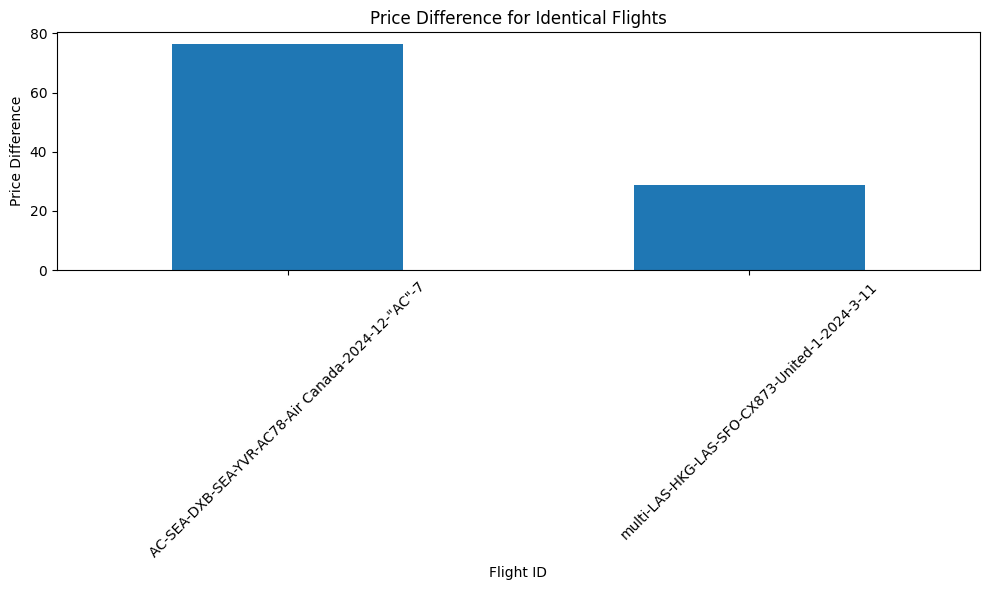

In [93]:
import matplotlib.pyplot as plt

# Assuming 'price_difference' is your Series with the price differences
significant_price_diff.plot(kind='bar', figsize=(10, 6))

plt.title('Price Difference for Identical Flights')
plt.xlabel('Flight ID')
plt.ylabel('Price Difference')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.tight_layout()  # Adjust layout to make room for the rotated labels

plt.show()

In [170]:
mask = df["Flight_ID"] == 'multi-LAS-HKG-LAS-SFO-CX873-Cathay Pacific-[2024, 11, 3, 6, 15]-[2024, 11, 1, 19, 53]-1-2024'

In [171]:
df[mask]

,airline_code,departure_airport_code,destination_airport_code,departure_date,arrival_date,ticket_price,First_flight,first_flight_code,last_flight_code,selling_airline,departure_time,arrival_time,Detected_Language,Assigned_Country,Assigned_Currency,Price_in_USD,Flight_ID
194,multi,LAS,HKG,"[2024, 11, 1, 19, 53]","[2024, 11, 3, 6, 15]",6713,LAS-SFO,UA2416,CX873,Cathay Pacific,1,2024,English (United States),United Kingdom,GBP,8458.380000,multi-LAS-HKG-LAS-SFO-CX873-Cathay Pacific-[20...
373,multi,LAS,HKG,"[2024, 11, 1, 19, 53]","[2024, 11, 3, 6, 15]",33874,LAS-SFO,UA2416,CX873,Cathay Pacific,1,2024,English (United States),Poland,PLN,8479.949412,multi-LAS-HKG-LAS-SFO-CX873-Cathay Pacific-[20...
497,multi,LAS,HKG,"[2024, 11, 1, 19, 53]","[2024, 11, 3, 6, 15]",262758,LAS-SFO,UA2416,CX873,Cathay Pacific,1,2024,English (United States),Türkiye,TRY,8487.083400,multi-LAS-HKG-LAS-SFO-CX873-Cathay Pacific-[20...
667,multi,LAS,HKG,"[2024, 11, 1, 19, 53]","[2024, 11, 3, 6, 15]",7459,LAS-SFO,UA2416,CX873,Cathay Pacific,1,2024,English (United States),Switzerland,CHF,8462.653204,multi-LAS-HKG-LAS-SFO-CX873-Cathay Pacific-[20...


In [172]:
custom_headers = {
    "GB": {"Accept-Language": "en-GB,en;q=0.9", "User-Agent": "Your-Custom-User-Agent-For-GB"},
    "TR": {"Accept-Language": "tr-TR,tr;q=0.9", "User-Agent": "Your-Custom-User-Agent-For-TR"},
    "CH": {"Accept-Language": "de-CH,de;q=0.9", "User-Agent": "Your-Custom-User-Agent-For-CH"},
    "PL": {"Accept-Language": "pl-PL,pl;q=0.9", "User-Agent": "Your-Custom-User-Agent-For-PL"},
    "AU": {"Accept-Language": "en-AU,en;q=0.9", "User-Agent": "Your-Custom-User-Agent-For-AU"},
    "BR": {"Accept-Language": "pt-BR,pt;q=0.9", "User-Agent": "Your-Custom-User-Agent-For-BR"},
    # Add more as needed
}

In [175]:
country_id = "GB"
    
# Get the headers for the specific country. If not available, set defaults.
headers = custom_headers.get(country_id, {
    "User-Agent": "Default-User-Agent",
    "Accept-Language": "en-US,en;q=0.9"
})


user_agent=headers["User-Agent"],  # This sets the user agent
extra_http_headers={k: v for k, v in headers.items() if k != "User-Agent"}  # This sets all other headers except the user agent


In [176]:
user_agent

('Your-Custom-User-Agent-For-GB',)

In [177]:
extra_http_headers

{'Accept-Language': 'en-GB,en;q=0.9'}

US Dates

Non US DATES

In [8]:
import random
from datetime import datetime, timedelta

def create_flight_query(airports):
    # Randomly select two different airports from the list
    departure, destination = random.sample(airports, 2)
    
    # Generate a random date within 2024
    start_date = datetime.strptime("21.02.2024", "%d.%m.%Y")
    end_date = datetime.strptime("31.12.2024", "%d.%m.%Y")
    
    # Calculate a random departure date
    days_between_dates = (end_date - start_date).days
    random_number_of_days = random.randrange(days_between_dates)
    departure_date = start_date + timedelta(days=random_number_of_days)
    
    # Ensure the return date is between departure date and 6 weeks later
    latest_return_date = departure_date + timedelta(weeks=6)
    if latest_return_date > end_date:
        latest_return_date = end_date
    
    days_for_return_trip = (latest_return_date - departure_date).days
    random_return_days = random.randrange(days_for_return_trip) if days_for_return_trip > 0 else 0
    return_date = departure_date + timedelta(days=random_return_days)
    
    # Format dates to dd.mm.yyyy format
    departure_date_str = departure_date.strftime("%d.%m.%Y")
    return_date_str = return_date.strftime("%d.%m.%Y")
    
    # Create the query
    query = {
        "departure": departure,
        "destination": destination,
        "departure_date": departure_date_str,
        "return_date": return_date_str
    }
    
    return query

In [57]:
airports = [
    'ATL', 'PEK', 'LAX', 'DXB', 'HND', 'ORD', 'LHR', 'PVG', 'CDG', 'DFW',
    'AMS', 'FRA', 'IST', 'CAN', 'SIN', 'DEN', 'DEL', 'CGK', 'JFK', 'KUL',
    'BKK', 'SFO', 'ICN', 'LAS', 'SEA', 'MIA', 'CLT', 'MCO', 'PHX', 'IAH',
    'MAD', 'YYZ', 'FCO', 'MUC', 'SYD', 'BCN', 'CTU', 'SZX', 'MEX', 'TPE',
    'LGW', 'SVO', 'BOM', 'GRU', 'SHA', 'EWR', 'ATL', 'NRT', 'MSP', 'DME',
    'DOH', 'PVG', 'CPT', 'PHL', 'OSL', 'DUB', 'BNE', 'YVR', 'IAD', 'BWI',
    'CUN', 'MAN', 'BOG', 'ZRH', 'BLR', 'VIE', 'SCL', 'JNB', 'LIS', 'TSN',
    'HKG', 'ARN', 'BUD', 'LIM', 'CGH', 'ORY', 'EDI', 'ADL', 'AKL', 'ATH',
    'CMN', 'DPS', 'HNL', 'CPT', 'KEF', 'LUX', 'MLE', 'MSY', 'NCE', 'OPO',
    'PER', 'RIO', 'SAL', 'TUN', 'VCE', 'WAW', 'ZAG', 'HEL', 'LED', 'LYS'
]

In [10]:
a = create_flight_query(airports)
a

{'departure': 'ATH',
 'destination': 'PVG',
 'departure_date': '21.04.2024',
 'return_date': '23.04.2024'}

In [65]:
a = []
for _ in range(100):
    temp = create_flight_query(airports)
    a.append(temp)

In [66]:
len(a)

100

In [16]:
type(a)

list

In [67]:
# Specify the filename
filename = 'myqueries2.json'

# Writing JSON data
with open(filename, 'w') as f:
    json.dump(a, f, indent=4, separators=(',', ': '))

In [62]:
import pandas as pd

df = pd.read_csv("Query3_results.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   airline_code              1815 non-null   object
 1   departure_airport_code    1815 non-null   object
 2   destination_airport_code  1815 non-null   object
 3   departure_date            1815 non-null   object
 4   arrival_date              1815 non-null   object
 5   ticket_price              1815 non-null   int64 
 6   First_flight              1815 non-null   object
 7   first_flight_code         1689 non-null   object
 8   last_flight_code          1815 non-null   object
 9   selling_airline           1815 non-null   object
 10  departure_time            1815 non-null   object
 11  arrival_time              1763 non-null   object
 12  Detected_Language         1815 non-null   object
 13  Assigned_Country          1815 non-null   object
 14  Assigned_Currency       

In [64]:
df.Assigned_Country.value_counts()

Assigned_Country
Türkiye           390
United Kingdom    317
Polska            219
Australia         199
Switzerland       197
Poland            186
Brasil            176
Palestine         106
Schweiz            25
Name: count, dtype: int64

In [21]:
df.Assigned_Currency.value_counts()

Assigned_Currency
PLN    405
TRY    390
GBP    317
CHF    222
AUD    199
BRL    176
JOD    106
Name: count, dtype: int64

In [22]:
# Example conversion rates to USD
# These rates are purely illustrative and may not reflect current rates
conversion_rates = {
    'CHF': 1.14,  # 1 CHF = 1.134556 USD as of Feb 20, 2024, according to X-Rates
    'TRY': 0.032,   # 1 TRY = 0.03230 USD as of Feb 21, 2024, according to Wise
    'PLN': 0.25,  # 1 PLN = 0.250338 USD as of Feb 21, 2024, according to Xe.com
    'GBP': 1.26,      # Example rate, adjust with the actual rate when available
    'JOD': 1.41,      # Example rate, adjust with the actual rate when available
    'AUD' : 0.65,
    'BRL' : 0.2

}


# Function to convert price to USD
def convert_to_usd(row):
    price = row['ticket_price']
    currency = row['Assigned_Currency']
    conversion_rate = conversion_rates.get(currency, 1.0)  # Default to 1.0 if currency not found
    return price * conversion_rate

# Apply the conversion to each row and create the new column
df['Price_in_USD'] = df.apply(convert_to_usd, axis=1)


In [24]:
df['Flight_ID'] = df[['airline_code', 'departure_airport_code', 'destination_airport_code','First_flight','last_flight_code','selling_airline','arrival_date','departure_date','departure_time','arrival_time']].astype(str).agg('-'.join, axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   airline_code              1815 non-null   object 
 1   departure_airport_code    1815 non-null   object 
 2   destination_airport_code  1815 non-null   object 
 3   departure_date            1815 non-null   object 
 4   arrival_date              1815 non-null   object 
 5   ticket_price              1815 non-null   int64  
 6   First_flight              1815 non-null   object 
 7   first_flight_code         1689 non-null   object 
 8   last_flight_code          1815 non-null   object 
 9   selling_airline           1815 non-null   object 
 10  departure_time            1815 non-null   object 
 11  arrival_time              1763 non-null   object 
 12  Detected_Language         1815 non-null   object 
 13  Assigned_Country          1815 non-null   object 
 14  Assigned

In [27]:
grouped = df.groupby('Flight_ID')
price_difference = grouped['Price_in_USD'].agg(lambda x: x.max() - x.min())
significant_price_diff = price_difference[price_difference > 20]

In [34]:
significant_price_diff

Flight_ID
AA-ATL-EZE-ATL-MIA-AA907-American-[2024, 4, 13, 9, 10]-[2024, 4, 12, 19, 30]-12-2024              20.908
AA-ATL-EZE-ATL-MIA-AA931-American-[2024, 4, 13, 7, 30]-[2024, 4, 12, 14, 4]-13-"AA"               20.908
AA-ICN-IAH-ICN-DFW-AA1392-American-[2024, 9, 19, 19, 56]-[2024, 9, 19, 17, 25]-19-2024            26.330
AA-LAS-LAX-LAS-LAX-AA2002-American-[2024, 3, 4, 14, 40]-[2024, 3, 4, 13, 21]-4-2024               22.300
AC-PVG-SEA-PVG-YVR-AC8804-Air Canada-[2024, 5, 19, 14, 27]-[2024, 5, 19, 15, 55]-2024-5           34.400
                                                                                                   ...  
multi-TPE-OPO-TPE-VIE-OS445-Austrian-[2024, 8, 1, 9, 40]-[2024, 7, 31, 23, 20]-2024-8             80.570
multi-YUL-CPT-YUL-BOS-EK5794-Emirates-[2024, 3, 17, 11, 50]-[2024, 3, 15, 16, 45]-3-17            21.944
multi-YUL-CPT-YUL-FRA-LH6795-Air Canada-[2024, 3, 17, 10, 55]-[2024, 3, 15, 19, 5]-"LH"-"576"     20.008
multi-YUL-CPT-YUL-GVA-LX4643-SWISS-[2024, 3, 

In [32]:
filtered_df = df[df['Flight_ID'].isin(significant_price_diff)]


In [33]:
filtered_df

,airline_code,departure_airport_code,destination_airport_code,departure_date,arrival_date,ticket_price,First_flight,first_flight_code,last_flight_code,selling_airline,departure_time,arrival_time,Detected_Language,Assigned_Country,Assigned_Currency,Price_in_USD,Flight_ID


In [52]:
mask = df['Flight_ID'] =='multi-IST-HNL-IST-ICN-OZ6932-Turkish Airlines-[2024, 2, 26, 9, 30]-[2024, 2, 26, 2, 20]-2024-2'
df[mask]

,airline_code,departure_airport_code,destination_airport_code,departure_date,arrival_date,ticket_price,First_flight,first_flight_code,last_flight_code,selling_airline,departure_time,arrival_time,Detected_Language,Assigned_Country,Assigned_Currency,Price_in_USD,Flight_ID
348,multi,IST,HNL,"[2024, 2, 26, 2, 20]","[2024, 2, 26, 9, 30]",148518,IST-ICN,TK90,OZ6932,Turkish Airlines,2024,2,Türkçe,Türkiye,TRY,4752.576,multi-IST-HNL-IST-ICN-OZ6932-Turkish Airlines-...
708,multi,IST,HNL,"[2024, 2, 26, 2, 20]","[2024, 2, 26, 9, 30]",5081,IST-ICN,TK90,OZ6932,Turkish Airlines,2024,2,English (United States),United Kingdom,GBP,6402.060,multi-IST-HNL-IST-ICN-OZ6932-Turkish Airlines-...
709,multi,IST,HNL,"[2024, 2, 26, 2, 20]","[2024, 2, 26, 9, 30]",7997,IST-ICN,TK90,OZ6932,Turkish Airlines,2024,2,English (United States),United Kingdom,GBP,10076.220,multi-IST-HNL-IST-ICN-OZ6932-Turkish Airlines-...
1069,multi,IST,HNL,"[2024, 2, 26, 2, 20]","[2024, 2, 26, 9, 30]",9802,IST-ICN,TK90,OZ6932,Turkish Airlines,2024,2,English (United States),Australia,AUD,6371.300,multi-IST-HNL-IST-ICN-OZ6932-Turkish Airlines-...
1070,multi,IST,HNL,"[2024, 2, 26, 2, 20]","[2024, 2, 26, 9, 30]",15428,IST-ICN,TK90,OZ6932,Turkish Airlines,2024,2,English (United States),Australia,AUD,10028.200,multi-IST-HNL-IST-ICN-OZ6932-Turkish Airlines-...
1471,multi,IST,HNL,"[2024, 2, 26, 2, 20]","[2024, 2, 26, 9, 30]",23644,IST-ICN,TK90,OZ6932,Turkish Airlines,2024,2,Português (Brasil),Brasil,BRL,4728.800,multi-IST-HNL-IST-ICN-OZ6932-Turkish Airlines-...


In [47]:
# Calculating the relative price difference
relative_price_difference = grouped['Price_in_USD'].agg(lambda x: ((x.max() - x.min()) / x.min()) * 100)

# Filtering for significant relative price differences, here defined as greater than a certain percentage
# Adjust the percentage threshold as needed
significant_relative_diff = relative_price_difference[relative_price_difference > 10]  # For example, more than 20%

print(significant_relative_diff)

Flight_ID
F9-DEN-SFO-DEN-SFO-F91093-https://encrypted-tbn2.gstatic.com/images?q\u003dtbn:ANd9GcT0m3vvsmLYW9jKUBbXjus74m5fandHrh4Tqz3RAzsITCt2pTLh8awvdbC78oLmKNuRDQLVhgqnOC6CBg-[2024, 3, 28, 13, 15]-[2024, 3, 28, 11, 19]-"F9"-"1093"     22.392638
F9-DEN-SFO-DEN-SFO-F91229-Frontier-[2024, 3, 28, 23, 47]-[2024, 3, 28, 21, 47]-"F9"-"1229"                                                                                                                                        22.392638
UA-DEN-SFO-DEN-SFO-UA1007-United-[2024, 3, 28, 19, 33]-[2024, 3, 28, 17, 45]-3-28                                                                                                                                                 10.898876
UA-DEN-SFO-DEN-SFO-UA1420-2024-[2024, 3, 28, 17, 48]-[2024, 3, 28, 15, 56]-3-28                                                                                                                                                   10.898876
UA-DEN-SFO-DEN-SFO-UA1561-United-[2024, 3, 28,

In [48]:
significant_relative_diff

Flight_ID
F9-DEN-SFO-DEN-SFO-F91093-https://encrypted-tbn2.gstatic.com/images?q\u003dtbn:ANd9GcT0m3vvsmLYW9jKUBbXjus74m5fandHrh4Tqz3RAzsITCt2pTLh8awvdbC78oLmKNuRDQLVhgqnOC6CBg-[2024, 3, 28, 13, 15]-[2024, 3, 28, 11, 19]-"F9"-"1093"     22.392638
F9-DEN-SFO-DEN-SFO-F91229-Frontier-[2024, 3, 28, 23, 47]-[2024, 3, 28, 21, 47]-"F9"-"1229"                                                                                                                                        22.392638
UA-DEN-SFO-DEN-SFO-UA1007-United-[2024, 3, 28, 19, 33]-[2024, 3, 28, 17, 45]-3-28                                                                                                                                                 10.898876
UA-DEN-SFO-DEN-SFO-UA1420-2024-[2024, 3, 28, 17, 48]-[2024, 3, 28, 15, 56]-3-28                                                                                                                                                   10.898876
UA-DEN-SFO-DEN-SFO-UA1561-United-[2024, 3, 28,

In [49]:
len(significant_relative_diff)

10

In [1]:
import pandas as pd

df = pd.read_csv("Query4_results.csv")
df.head(10)

/var/folders/fs/20409g9545qdjn0qhsrcd8q80000gn/T/ipykernel_31243/4001176801.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,airline_code,departure_airport_code,destination_airport_code,departure_date,arrival_date,ticket_price,First_flight,first_flight_code,last_flight_code,selling_airline,departure_time,arrival_time,Detected_Language,Assigned_Country,Assigned_Currency
0,AA,CLT,CUN,"[2024, 6, 26, 7, 15]","[2024, 6, 26, 9, 10]",383,CLT-CUN,AA881,AA881,American,6,26,Deutsch,Deutschland,EUR
1,AA,CLT,CUN,"[2024, 6, 26, 11, 50]","[2024, 6, 26, 13, 54]",383,CLT-CUN,AA886,AA886,American,6,26,Deutsch,Deutschland,EUR
2,AA,CLT,CUN,"[2024, 6, 26, 13, 5]","[2024, 6, 26, 14, 59]",383,CLT-CUN,AA1778,AA1778,American,6,26,Deutsch,Deutschland,EUR
3,AA,CLT,CUN,"[2024, 6, 26, 9, 5]","[2024, 6, 26, 11, 13]",410,CLT-CUN,AA895,AA895,American,6,26,Deutsch,Deutschland,EUR
4,UA,CLT,CUN,"[2024, 6, 26, 10, 7]","[2024, 6, 26, 15, 51]",401,CLT-IAD,UA1361,UA1618,United,2024,6,Deutsch,Deutschland,EUR
5,AA,CLT,CUN,"[2024, 6, 26, 14, 30]","[2024, 6, 26, 18, 24]",414,CLT-MIA,AA1114,AA2492,American,"""AA""","""2492""",Deutsch,Deutschland,EUR
6,F9,CLT,CUN,"[2024, 6, 26, 19, 32]","[2024, 6, 27, 13]",437,CLT-DEN,F92985,70null,Frontier,2024,6,Deutsch,Deutschland,EUR
7,UA,CLT,CUN,"[2024, 6, 26, 17, 10]","[2024, 6, 26, 22, 7]",456,CLT-IAH,UA675,UA1084,2024,6,26,Deutsch,Deutschland,EUR
8,AA,CLT,CUN,"[2024, 6, 26, 20, 10]","[2024, 6, 27, 11, 5]",479,CLT-MIA,AA1031,1157null,American,"""AA""","""1157""",Deutsch,Deutschland,EUR
9,DL,CLT,CUN,"[2024, 6, 26, 7, 5]","[2024, 6, 26, 11, 19]",594,CLT-ATL,DL3156,DL586,Delta,2024,6,Deutsch,Deutschland,EUR


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12464 entries, 0 to 12463
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   airline_code              12464 non-null  object
 1   departure_airport_code    12464 non-null  object
 2   destination_airport_code  12464 non-null  object
 3   departure_date            12464 non-null  object
 4   arrival_date              12464 non-null  object
 5   ticket_price              12464 non-null  int64 
 6   First_flight              12464 non-null  object
 7   first_flight_code         11774 non-null  object
 8   last_flight_code          12464 non-null  object
 9   selling_airline           12464 non-null  object
 10  departure_time            12460 non-null  object
 11  arrival_time              12128 non-null  object
 12  Detected_Language         12464 non-null  object
 13  Assigned_Country          12464 non-null  object
 14  Assigned_Currency     

In [4]:
df['Flight_ID'] = df[['airline_code', 'departure_airport_code', 'destination_airport_code','First_flight','last_flight_code','selling_airline','arrival_date','departure_date','departure_time','arrival_time']].astype(str).agg('-'.join, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12464 entries, 0 to 12463
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   airline_code              12464 non-null  object
 1   departure_airport_code    12464 non-null  object
 2   destination_airport_code  12464 non-null  object
 3   departure_date            12464 non-null  object
 4   arrival_date              12464 non-null  object
 5   ticket_price              12464 non-null  int64 
 6   First_flight              12464 non-null  object
 7   first_flight_code         11774 non-null  object
 8   last_flight_code          12464 non-null  object
 9   selling_airline           12464 non-null  object
 10  departure_time            12460 non-null  object
 11  arrival_time              12128 non-null  object
 12  Detected_Language         12464 non-null  object
 13  Assigned_Country          12464 non-null  object
 14  Assigned_Currency     

In [9]:
df.Assigned_Currency.value_counts()

Assigned_Currency
PLN    1456
CHF    1398
IDR    1312
TRY    1256
EUR    1188
AUD    1064
ALL    1062
BRL     922
JPY     834
BDT     824
GBP     710
JOD     270
USD     168
Name: count, dtype: int64

In [10]:
# Example conversion rates to USD
# These rates are purely illustrative and may not reflect current rates
conversion_rates = {
    'CHF': 1.14,  # 1 CHF = 1.134556 USD as of Feb 20, 2024, according to X-Rates
    'TRY': 0.032,   # 1 TRY = 0.03230 USD as of Feb 21, 2024, according to Wise
    'PLN': 0.25,  # 1 PLN = 0.250338 USD as of Feb 21, 2024, according to Xe.com
    'GBP': 1.26,      # Example rate, adjust with the actual rate when available
    'JOD': 1.41,      # Example rate, adjust with the actual rate when available
    'AUD' : 0.66,
    'BRL' : 0.2,
    'IDR' : 0.000064,
    'USD' : 1.0,
    'EUR' : 1.08,
    'ALL' : 0.010,
    'JPY' : 0.0066,
    'BDT' : 0.0091,

}


# Function to convert price to USD
def convert_to_usd(row):
    price = row['ticket_price']
    currency = row['Assigned_Currency']
    conversion_rate = conversion_rates.get(currency, 1.0)  # Default to 1.0 if currency not found
    return price * conversion_rate

# Apply the conversion to each row and create the new column
df['Price_in_USD'] = df.apply(convert_to_usd, axis=1)

In [12]:
grouped = df.groupby('Flight_ID')
price_difference = grouped['Price_in_USD'].agg(lambda x: x.max() - x.min())
significant_price_diff = price_difference[price_difference > 20]

In [18]:
# Calculating the relative price difference
relative_price_difference = grouped['Price_in_USD'].agg(lambda x: ((x.max() - x.min()) / x.min()) * 100)

# Filtering for significant relative price differences, here defined as greater than a certain percentage
# Adjust the percentage threshold as needed
significant_relative_diff = relative_price_difference[relative_price_difference > 5]  # For example, more than 20%

print(significant_relative_diff)

Flight_ID
AA-LAX-LIS-LAX-PHL-BA4801-American-[2024, 9, 10, 9, 5]-[2024, 9, 9, 11, 50]-9-2024                 49.047017
AC-LAX-LIS-LAX-YUL-UA8105-2024-[2024, 9, 10, 9, 20]-[2024, 9, 9, 12, 10]-9-10                     112.906854
AF-LHR-CDG-LHR-CDG-AF1181-Air France-[2024, 11, 13, 22, 5]-[2024, 11, 13, 19, 45]-11-13             5.335886
AF-LHR-CDG-LHR-CDG-AF1281-Air France-[2024, 11, 13, 19, 55]-[2024, 11, 13, 17, 35]-11-13            5.335886
AF-LHR-CDG-LHR-CDG-AF1381-2024-[2024, 11, 13, 8, 40]-[2024, 11, 13, 6, 20]-11-13                    5.335886
AF-LHR-CDG-LHR-CDG-AF1581-Air France-[2024, 11, 13, 13, 50]-[2024, 11, 13, 11, 30]-11-13            5.335886
AF-LHR-CDG-LHR-CDG-AF1681-Air France-[2024, 11, 13, 11]-[2024, 11, 13, 9]-13-"AF"                   5.335886
AF-LHR-CDG-LHR-CDG-AF1781-Air France-[2024, 11, 13, 17, 5]-[2024, 11, 13, 14, 45]-11-13             5.335886
AZ-FCO-MAD-FCO-MAD-AZ58-2024-[2024, 11, 28, 10, 55]-[2024, 11, 28, 8, 20]-28-"AZ"                   5.162898
AZ-FCO-MA

In [21]:
significant_relative_diff

Flight_ID
AA-LAX-LIS-LAX-PHL-BA4801-American-[2024, 9, 10, 9, 5]-[2024, 9, 9, 11, 50]-9-2024                 49.047017
AC-LAX-LIS-LAX-YUL-UA8105-2024-[2024, 9, 10, 9, 20]-[2024, 9, 9, 12, 10]-9-10                     112.906854
AF-LHR-CDG-LHR-CDG-AF1181-Air France-[2024, 11, 13, 22, 5]-[2024, 11, 13, 19, 45]-11-13             5.335886
AF-LHR-CDG-LHR-CDG-AF1281-Air France-[2024, 11, 13, 19, 55]-[2024, 11, 13, 17, 35]-11-13            5.335886
AF-LHR-CDG-LHR-CDG-AF1381-2024-[2024, 11, 13, 8, 40]-[2024, 11, 13, 6, 20]-11-13                    5.335886
AF-LHR-CDG-LHR-CDG-AF1581-Air France-[2024, 11, 13, 13, 50]-[2024, 11, 13, 11, 30]-11-13            5.335886
AF-LHR-CDG-LHR-CDG-AF1681-Air France-[2024, 11, 13, 11]-[2024, 11, 13, 9]-13-"AF"                   5.335886
AF-LHR-CDG-LHR-CDG-AF1781-Air France-[2024, 11, 13, 17, 5]-[2024, 11, 13, 14, 45]-11-13             5.335886
AZ-FCO-MAD-FCO-MAD-AZ58-2024-[2024, 11, 28, 10, 55]-[2024, 11, 28, 8, 20]-28-"AZ"                   5.162898
AZ-FCO-MA

In [23]:
mask = df['Flight_ID'] =='UA-LAX-LIS-LAX-IAD-LH7527-United-[2024, 9, 10, 10, 30]-[2024, 9, 9, 13, 15]-9-2024'
df[mask]

,airline_code,departure_airport_code,destination_airport_code,departure_date,arrival_date,ticket_price,First_flight,first_flight_code,last_flight_code,selling_airline,departure_time,arrival_time,Detected_Language,Assigned_Country,Assigned_Currency,Flight_ID,Price_in_USD
523,UA,LAX,LIS,"[2024, 9, 9, 13, 15]","[2024, 9, 10, 10, 30]",19162333,LAX-IAD,UA1635,LH7527,United,9,2024,Indonesia,Indonesia,IDR,"UA-LAX-LIS-LAX-IAD-LH7527-United-[2024, 9, 10,...",1226.389312
534,UA,LAX,LIS,"[2024, 9, 9, 13, 15]","[2024, 9, 10, 10, 30]",19162333,LAX-IAD,UA1635,LH7527,United,9,2024,Indonesia,Indonesia,IDR,"UA-LAX-LIS-LAX-IAD-LH7527-United-[2024, 9, 10,...",1226.389312
1223,UA,LAX,LIS,"[2024, 9, 9, 13, 15]","[2024, 9, 10, 10, 30]",4888,LAX-IAD,UA1635,LH7527,United,9,2024,Polski,Polska,PLN,"UA-LAX-LIS-LAX-IAD-LH7527-United-[2024, 9, 10,...",1222.000000
1235,UA,LAX,LIS,"[2024, 9, 9, 13, 15]","[2024, 9, 10, 10, 30]",4888,LAX-IAD,UA1635,LH7527,United,9,2024,Polski,Polska,PLN,"UA-LAX-LIS-LAX-IAD-LH7527-United-[2024, 9, 10,...",1222.000000
1423,UA,LAX,LIS,"[2024, 9, 9, 13, 15]","[2024, 9, 10, 10, 30]",38130,LAX-IAD,UA1635,LH7527,United,9,2024,Türkçe,Türkiye,TRY,"UA-LAX-LIS-LAX-IAD-LH7527-United-[2024, 9, 10,...",1220.160000
1434,UA,LAX,LIS,"[2024, 9, 9, 13, 15]","[2024, 9, 10, 10, 30]",38130,LAX-IAD,UA1635,LH7527,United,9,2024,Türkçe,Türkiye,TRY,"UA-LAX-LIS-LAX-IAD-LH7527-United-[2024, 9, 10,...",1220.160000
4060,UA,LAX,LIS,"[2024, 9, 9, 13, 15]","[2024, 9, 10, 10, 30]",1079,LAX-IAD,UA1635,LH7527,United,9,2024,Deutsch,Schweiz,CHF,"UA-LAX-LIS-LAX-IAD-LH7527-United-[2024, 9, 10,...",1230.060000
4072,UA,LAX,LIS,"[2024, 9, 9, 13, 15]","[2024, 9, 10, 10, 30]",1079,LAX-IAD,UA1635,LH7527,United,9,2024,Deutsch,Schweiz,CHF,"UA-LAX-LIS-LAX-IAD-LH7527-United-[2024, 9, 10,...",1230.060000
4402,UA,LAX,LIS,"[2024, 9, 9, 13, 15]","[2024, 9, 10, 10, 30]",3316,LAX-IAD,UA1635,LH7527,United,9,2024,English (United States),United Kingdom,GBP,"UA-LAX-LIS-LAX-IAD-LH7527-United-[2024, 9, 10,...",4178.160000
4415,UA,LAX,LIS,"[2024, 9, 9, 13, 15]","[2024, 9, 10, 10, 30]",3316,LAX-IAD,UA1635,LH7527,United,9,2024,English (United States),United Kingdom,GBP,"UA-LAX-LIS-LAX-IAD-LH7527-United-[2024, 9, 10,...",4178.160000
